# This is a title

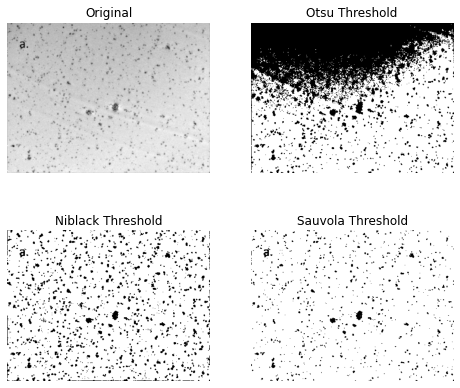

In [5]:
import cv2
import matplotlib.pyplot as plt

from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)

im = cv2.imread('sample_images/image-1a.png')
image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
binary_otsu = image > threshold_otsu(image)

window_size = 35
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Otsu Threshold')
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()
